 # Unsupervised Analysis of a Movie Ratings Dataset Using Matrix Factorization


In this project, we will use two different matrix factorization techniques:

- Singular Value Decomposition (SVD)

- Non-negative Matrix Factorization (NMF)

## Loading the data 


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
data.tail()


,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [72]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


## Forming the matrix 

There are a couple of caveats to be aware of here:
- The movieId column in the data refers to a general movieId in the large MovieLens dataset. Since we are working with the smaller dataset here, we do not have all movieId's present. Thus, you should be able to make sure that a certain movieId maps to an increasing row number of your matrix and you keep track of that mapping
- The userId column, since user information is not present, can be treated as a unique user ID.
- If for some reason Pandas is not able to load all the rows of the ratings.csv in memory, please form a matrix with as many ratings as you are able to load.

In [73]:
merged_data = data.merge(movies, on='movieId', how='left') # combine the two dataframes

merged_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [74]:
# a dictionary keys = movie IDs  and the values are the corresponding indices assigned by the `enumerate` function.
movie_mapping = {movie_id: index for index, movie_id in enumerate(merged_data['movieId'].unique())}
#print (movie_mapping)
merged_data['movieIndex'] = merged_data['movieId'].map(movie_mapping)
#print (merged_data)
num_movies = len(movie_mapping)
num_users = merged_data['userId'].nunique()
merged_data.head()


,userId,movieId,rating,timestamp,title,genres,movieIndex
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,2
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4


In [75]:
movie_user_matrix = np.zeros((num_movies, num_users))

for row in merged_data.itertuples():
    movie_index = row.movieIndex
    user_id = row.userId
    rating = row.rating
    movie_user_matrix[movie_index, user_id - 1] = rating

 
#print(movie_user_matrix.shape)
print(movie_user_matrix)

[[4.  0.  0.  ... 2.5 3.  5. ]
 [4.  0.  0.  ... 2.  0.  0. ]
 [4.  0.  0.  ... 0.  0.  5. ]
 ...
 [0.  0.  0.  ... 0.  0.  3. ]
 [0.  0.  0.  ... 0.  0.  3.5]
 [0.  0.  0.  ... 0.  0.  3.5]]


## Running and inspecting the SVD 

After running the SVD, plot in a semi-logarithmic scale (where the y-axis is in log scale and the x-axis is in linear scale) the singular values of the matrix. What do you observe?


(610,)


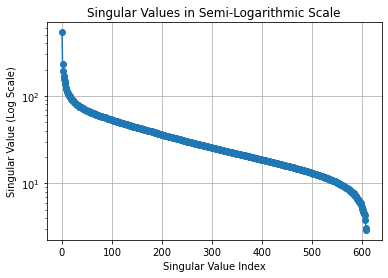

In [76]:
U, S, V = np.linalg.svd(movie_user_matrix)
print(S.shape)
# n = len(S)
# diagonal_matrix = np.zeros((n, n))
# np.fill_diagonal(diagonal_matrix, S)
#print(S)
# Plot the singular values in a semi-log scale
plt.figure()
plt.semilogy(S, marker='o')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value (Log Scale)')
plt.title('Singular Values in Semi-Logarithmic Scale')
plt.grid(True)
plt.show()
# print(U.shape)
# print(V.shape)

Your answer here:

## Inspecting the latent concepts


In [77]:
def print_concepts(U, num_of_concepts, top_mov):
    for j in range(num_of_concepts):
        concept_values = np.abs(U[:, j])  # Taking the absolute value of the membership vector
        
        top_indices = np.argsort(concept_values)[::-1][:top_mov]
        
        print(f"Concept {j+1}:")
        for i, idx in enumerate(top_indices):
            movie_genre = merged_data.loc[merged_data['movieIndex'] == idx,"genres"].iloc[0]             
            movie_title = merged_data.loc[merged_data['movieIndex'] == idx, "title"].iloc[0]
            print(f"Top {i+1} movie: {movie_title} ({movie_genre}), Value: {concept_values[idx]}")
        
        print("")


In [78]:
num_of_concepts = 5
top_mov = 3
print_concepts(U, num_of_concepts, top_mov)

Concept 1:
Top 1 movie: Forrest Gump (1994) (Comedy|Drama|Romance|War), Value: 0.1003673522259191
Top 2 movie: Pulp Fiction (1994) (Comedy|Crime|Drama|Thriller), Value: 0.09832412909392842
Top 3 movie: Matrix, The (1999) (Action|Sci-Fi|Thriller), Value: 0.09712841613995891

Concept 2:
Top 1 movie: Inception (2010) (Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX), Value: 0.09779012715898305
Top 2 movie: Dark Knight, The (2008) (Action|Crime|Drama|IMAX), Value: 0.0959916690202167
Top 3 movie: Up (2009) (Adventure|Animation|Children|Drama), Value: 0.07915387463405052

Concept 3:
Top 1 movie: Forrest Gump (1994) (Comedy|Drama|Romance|War), Value: 0.16451992041382732
Top 2 movie: Braveheart (1995) (Action|Drama|War), Value: 0.15159050439147906
Top 3 movie: Shawshank Redemption, The (1994) (Crime|Drama), Value: 0.1500739257891691

Concept 4:
Top 1 movie: Fight Club (1999) (Action|Crime|Drama|Thriller), Value: 0.13626938704546768
Top 2 movie: Matrix, The (1999) (Action|Sci-Fi|Thriller), Valu

## Implementing NMF and inspecting the latent concepts


In [79]:


def nonnegative_matrix_factorization(X, R, init=1,max_iter=100):
    if init==1:
        U, S, V = np.linalg.svd(X, full_matrices=False)
        W = np.abs(U[:, :R])
        H = np.abs(np.dot(np.diag(S[:R]), V[:R, :]))
    elif init ==0:
        I, J = X.shape
        W = np.random.rand(I, R)
        H = np.random.rand(R, J)
    all_err = []
    
    for iter in range(max_iter):
        # Update H
        #H = np.maximum(0, H * np.dot(W.T, X) / (np.dot(np.dot(W.T, W), H) + 1e-9))
        H =  H * np.dot(W.T, X) / np.dot(np.dot(W.T, W), H)
        
        # Update W
        W = W * np.dot(X, H.T) / np.dot(W, np.dot(H, H.T)) 
        
        # Calculate Frobenius norm error
        err = np.linalg.norm(X - np.dot(W, H),  ord='fro')
        
        all_err.append(err)
        
        # if iter % 10 == 0:
        #     print("Iteration {}: Frobenius norm error = {:.4f}".format(iter, err))
    
    return W, H, all_err

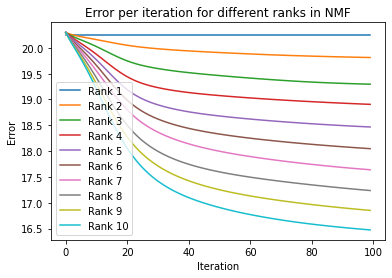

In [80]:
# Define the maximum rank to test
max_rank = 10

# Prepare data matrix X (replace this with your actual data)
X = np.random.rand(100, 50)

# Run NMF for different ranks
errors = []
for rank in range(1, max_rank + 1):
    #W, H, error = nonnegative_matrix_factorization(X, rank, init=1, max_iter=100)
    W, H, error = nonnegative_matrix_factorization(X, rank,1 , max_iter=100)
    errors.append(error)

# Plot the errors per iteration for each rank
plt.figure()
for i, error in enumerate(errors):
    plt.plot(range(len(error)), error, label=f'Rank {i+1}')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.title('Error per iteration for different ranks in NMF')
plt.show()

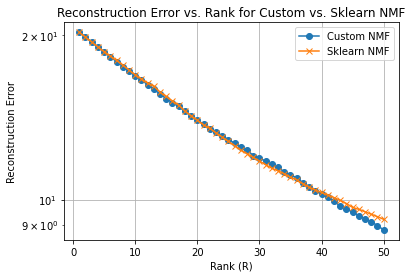

In [81]:



errors_custom = []

for rank in range(1, 51):
    #W_custom, H_custom, all_err = nonnegative_matrix_factorization(X, rank, 1, 100)
    W_custom, H_custom, all_err = nonnegative_matrix_factorization(X, rank, 1,  200)
    #error_custom = all_err  # Extract the error for the specific rank
    errors_custom.append(np.mean(all_err))

errors_sklearn = []  # Store errors for Sklearn NMF (for comparison)

for rank in range(1, 51):
    # Sklearn NMF
    #nmf = NMF(n_components=rank, max_iter=100, random_state=42)
 
    nmf = NMF(n_components=rank,  max_iter=200 , solver='mu', beta_loss='frobenius')
    
    
    W_sklearn = nmf.fit_transform(X)
    H_sklearn = nmf.components_
    X_pred_sklearn = np.dot(W_sklearn, H_sklearn)
    error_sklearn = np.linalg.norm(X - X_pred_sklearn, ord='fro')  # Frobenius norm
    errors_sklearn.append(error_sklearn)

# Plotting error vs. rank
plt.figure()
plt.yscale('log')
plt.semilogy(range(1, 51), errors_custom, label='Custom NMF', marker='o')
plt.semilogy(range(1, 51), errors_sklearn, label='Sklearn NMF', marker='x')

plt.xlabel('Rank (R)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Rank for Custom vs. Sklearn NMF')
plt.legend()
plt.grid()
plt.show()

### Inspecting NMF latent concepts 

Use the "print_concepts" function as above with the same number of concepts and top movies per concept.

Do you observe more, less, or about the same coherence?

In [82]:
W, H, all_err = nonnegative_matrix_factorization(movie_user_matrix, 50, 1,100)
#9724
num_of_concepts = 5
top_mov = 3
print("NMF latent concepts - the W and H are SVD generated ")
print_concepts(W, num_of_concepts, top_mov)

print("********************************************************************************")
print("********************************************************************************")

#W, H, all_err = nonnegative_matrix_factorization(movie_user_matrix, 10,0,100)
W, H, all_err = nonnegative_matrix_factorization(movie_user_matrix, 50, 0,100)
#9724
num_of_concepts = 5
top_mov = 3
print("NMF latent concepts - the W and H are randomly generated ")
print_concepts(W, num_of_concepts, top_mov)


NMF latent concepts - the W and H are SVD generated 
Concept 1:
Top 1 movie: Fifth Element, The (1997) (Action|Adventure|Comedy|Sci-Fi), Value: 0.15587112526396837
Top 2 movie: Bourne Identity, The (2002) (Action|Mystery|Thriller), Value: 0.1552991840974782
Top 3 movie: Star Wars: Episode VI - Return of the Jedi (1983) (Action|Adventure|Sci-Fi), Value: 0.15481075151033502

Concept 2:
Top 1 movie: Avengers, The (2012) (Action|Adventure|Sci-Fi|IMAX), Value: 0.2934459879583534
Top 2 movie: Dark Knight, The (2008) (Action|Crime|Drama|IMAX), Value: 0.2932896200886409
Top 3 movie: Up (2009) (Adventure|Animation|Children|Drama), Value: 0.281086141474868

Concept 3:
Top 1 movie: Fugitive, The (1993) (Thriller), Value: 0.4006927394411367
Top 2 movie: Forrest Gump (1994) (Comedy|Drama|Romance|War), Value: 0.389568308297815
Top 3 movie: Apollo 13 (1995) (Adventure|Drama|IMAX), Value: 0.3891588347509451

Concept 4:
Top 1 movie: Shawshank Redemption, The (1994) (Crime|Drama), Value: 0.5515529139813